## Data Wrangling

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Gather Data](#gather)
- [Assessing Data](#assessing)
- [Cleaning Data](#cleaning)
- [Analyzing Data](#analyzing)
- [Visualizing Data](#visualizing)

<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import time
import math
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='gather'></a>
### Gather Data


In [2]:
# Loading first datset
twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#use request library to download the tsv file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
# Import the tweet image predictions TSV file into a DataFrame
img_df = pd.read_csv('image_predictions.tsv', sep='\t')

In [5]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)


#Set Twitter's rate limit
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify =True)

In [6]:
# Using the tweet IDs in the Twitter archive, query the Twitter API for each tweet's JSON

start = time.time() # start timer

with open('getstatus_error.txt', 'w') as errfile: 
    valid_ids = 0
    err_ids = 0
    tweet_ids = twitter_arch.tweet_id
    with open('tweet_json.txt', 'w', encoding='utf-8') as outfile:
        for i, tweet_id in tweet_ids.iteritems():
            try:
                print("%s# %s" % (str(i+1), tweet_id))
                # Get tweet data using Twitter API
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                json_content = tweet._json
                
                # Write each tweet's JSON data to its own line in a file
                json.dump(json_content, outfile)
                outfile.write('\n')
                valid_ids += 1
            except tweepy.TweepError as e:
                err_ids += 1
                err_str = []
                err_str.append(str(tweet_id))
                err_str.append(': ')
                err_str.append(e.response.json()['errors'][0]['message'])
                err_str.append('\n')
                errfile.write(''.join(err_str))
                print(''.join(err_str))
                continue
        print("%s %s" % ('Valid tweets:', valid_ids))
        print("%s %s" % ('Error tweets:', err_ids))
        
end = time.time() # end timer
print((end - start)/(1000*60))

1# 892420643555336193
2# 892177421306343426
3# 891815181378084864
4# 891689557279858688
5# 891327558926688256
6# 891087950875897856
7# 890971913173991426
8# 890729181411237888
9# 890609185150312448
10# 890240255349198849
11# 890006608113172480
12# 889880896479866881
13# 889665388333682689
14# 889638837579907072
15# 889531135344209921
16# 889278841981685760
17# 888917238123831296
18# 888804989199671297
19# 888554962724278272
20# 888202515573088257
888202515573088257: No status found with that ID.

21# 888078434458587136
22# 887705289381826560
23# 887517139158093824
24# 887473957103951883
25# 887343217045368832
26# 887101392804085760
27# 886983233522544640
28# 886736880519319552
29# 886680336477933568
30# 886366144734445568
31# 886267009285017600
32# 886258384151887873
33# 886054160059072513
34# 885984800019947520
35# 885528943205470208
36# 885518971528720385
37# 885311592912609280
38# 885167619883638784
39# 884925521741709313
40# 884876753390489601
41# 884562892145688576
42# 88444180538

318# 834786237630337024
319# 834574053763584002
320# 834477809192075265
321# 834458053273591808
322# 834209720923721728
323# 834167344700198914
324# 834089966724603904
325# 834086379323871233
326# 833863086058651648
327# 833826103416520705
328# 833732339549220864
329# 833722901757046785
330# 833479644947025920
331# 833124694597443584
332# 832998151111966721
333# 832769181346996225
334# 832757312314028032
335# 832682457690300417
336# 832645525019123713
337# 832636094638288896
338# 832397543355072512
339# 832369877331693569
340# 832273440279240704
341# 832215909146226688
342# 832215726631055365
343# 832088576586297345
344# 832040443403784192
345# 832032802820481025
346# 831939777352105988
347# 831926988323639298
348# 831911600680497154
349# 831670449226514432
350# 831650051525054464
351# 831552930092285952
352# 831322785565769729
353# 831315979191906304
354# 831309418084069378
355# 831262627380748289
356# 830956169170665475
357# 830583320585068544
358# 830173239259324417
359# 83009740037

652# 792773781206999040
653# 792394556390137856
654# 792050063153438720
655# 791821351946420224
656# 791784077045166082
657# 791780927877898241
658# 791774931465953280
659# 791672322847637504
660# 791406955684368384
661# 791312159183634433
662# 791026214425268224
663# 790987426131050500
664# 790946055508652032
665# 790723298204217344
666# 790698755171364864
667# 790581949425475584
668# 790337589677002753
669# 790277117346975746
670# 790227638568808452
671# 789986466051088384
672# 789960241177853952
673# 789903600034189313
674# 789628658055020548
675# 789599242079838210
676# 789530877013393408
677# 789314372632018944
678# 789280767834746880
679# 789268448748703744
680# 789137962068021249
681# 788908386943430656
682# 788765914992902144
683# 788552643979468800
684# 788412144018661376
685# 788178268662984705
686# 788150585577050112
687# 788070120937619456
688# 788039637453406209
689# 787810552592695296
690# 787717603741622272
691# 787397959788929025
692# 787322443945877504
693# 78711194249

Rate limit reached. Sleeping for: 617


902# 758474966123810816
903# 758467244762497024
904# 758405701903519748
905# 758355060040593408
906# 758099635764359168
907# 758041019896193024
908# 757741869644341248
909# 757729163776290825
910# 757725642876129280
911# 757611664640446465
912# 757597904299253760
913# 757596066325864448
914# 757400162377592832
915# 757393109802180609
916# 757354760399941633
917# 756998049151549440
918# 756939218950160384
919# 756651752796094464
920# 756526248105566208
921# 756303284449767430
922# 756288534030475264
923# 756275833623502848
924# 755955933503782912
925# 755206590534418437
926# 755110668769038337
927# 754874841593970688
928# 754856583969079297
929# 754747087846248448
930# 754482103782404096
931# 754449512966619136
932# 754120377874386944
933# 754011816964026368
754011816964026368: No status found with that ID.

934# 753655901052166144
935# 753420520834629632
936# 753398408988139520
937# 753375668877008896
938# 753298634498793472
939# 753294487569522689
940# 753039830821511168
941# 75302697

1233# 713175907180089344
1234# 712809025985978368
1235# 712717840512598017
1236# 712668654853337088
1237# 712438159032893441
1238# 712309440758808576
1239# 712097430750289920
1240# 712092745624633345
1241# 712085617388212225
1242# 712065007010385924
1243# 711998809858043904
1244# 711968124745228288
1245# 711743778164514816
1246# 711732680602345472
1247# 711694788429553666
1248# 711652651650457602
1249# 711363825979756544
1250# 711306686208872448
1251# 711008018775851008
1252# 710997087345876993
1253# 710844581445812225
1254# 710833117892898816
1255# 710658690886586372
1256# 710609963652087808
1257# 710588934686908417
1258# 710296729921429505
1259# 710283270106132480
1260# 710272297844797440
1261# 710269109699739648
1262# 710153181850935296
1263# 710140971284037632
1264# 710117014656950272
1265# 709918798883774466
1266# 709901256215666688
1267# 709852847387627521
1268# 709566166965075968
1269# 709556954897764353
1270# 709519240576036864
1271# 709449600415961088
1272# 709409458133323776


1562# 688385280030670848
1563# 688211956440801280
1564# 688179443353796608
1565# 688116655151435777
1566# 688064179421470721
1567# 687841446767013888
1568# 687826841265172480
1569# 687818504314159109
1570# 687807801670897665
1571# 687732144991551489
1572# 687704180304273409
1573# 687664829264453632
1574# 687494652870668288
1575# 687480748861947905
1576# 687476254459715584
1577# 687460506001633280
1578# 687399393394311168
1579# 687317306314240000
1580# 687312378585812992
1581# 687127927494963200
1582# 687124485711986689
1583# 687109925361856513
1584# 687102708889812993
1585# 687096057537363968
1586# 686947101016735744
1587# 686760001961103360
1588# 686749460672679938
1589# 686730991906516992
1590# 686683045143953408
1591# 686618349602762752
1592# 686606069955735556
1593# 686394059078897668
1594# 686386521809772549
1595# 686377065986265092
1596# 686358356425093120
1597# 686286779679375361
1598# 686050296934563840
1599# 686035780142297088
1600# 686034024800862208
1601# 686007916130873345


Rate limit reached. Sleeping for: 686


1801# 676975532580409345
1802# 676957860086095872
1803# 676949632774234114
1804# 676948236477857792
1805# 676946864479084545
1806# 676942428000112642
1807# 676936541936185344
1808# 676916996760600576
1809# 676897532954456065
1810# 676864501615042560
1811# 676821958043033607
1812# 676819651066732545
1813# 676811746707918848
1814# 676776431406465024
1815# 676617503762681856
1816# 676613908052996102
1817# 676606785097199616
1818# 676603393314578432
1819# 676593408224403456
1820# 676590572941893632
1821# 676588346097852417
1822# 676582956622721024
1823# 676575501977128964
1824# 676533798876651520
1825# 676496375194980353
1826# 676470639084101634
1827# 676440007570247681
1828# 676430933382295552
1829# 676263575653122048
1830# 676237365392908289
1831# 676219687039057920
1832# 676215927814406144
1833# 676191832485810177
1834# 676146341966438401
1835# 676121918416756736
1836# 676101918813499392
1837# 676098748976615425
1838# 676089483918516224
1839# 675898130735476737
1840# 675891555769696257


2129# 670303360680108032
2130# 670290420111441920
2131# 670093938074779648
2132# 670086499208155136
2133# 670079681849372674
2134# 670073503555706880
2135# 670069087419133954
2136# 670061506722140161
2137# 670055038660800512
2138# 670046952931721218
2139# 670040295598354432
2140# 670037189829525505
2141# 670003130994700288
2142# 669993076832759809
2143# 669972011175813120
2144# 669970042633789440
2145# 669942763794931712
2146# 669926384437997569
2147# 669923323644657664
2148# 669753178989142016
2149# 669749430875258880
2150# 669684865554620416
2151# 669683899023405056
2152# 669682095984410625
2153# 669680153564442624
2154# 669661792646373376
2155# 669625907762618368
2156# 669603084620980224
2157# 669597912108789760
2158# 669583744538451968
2159# 669573570759163904
2160# 669571471778410496
2161# 669567591774625800
2162# 669564461267722241
2163# 669393256313184256
2164# 669375718304980992
2165# 669371483794317312
2166# 669367896104181761
2167# 669363888236994561
2168# 669359674819481600


In [7]:
#creating a list with each tweet info
tweets = []
tweet_json = open('tweet_json.txt','r')

for line in tweet_json:
    tweet = json.loads(line)
    tweets.append(tweet)
    
tweet_json.close

<function TextIOWrapper.close()>

In [8]:
# creating a tweet_info DataFrame
df_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        df_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                        'display_text_range': status['display_text_range']
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
status_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])

In [9]:
status_df.sample(5)

,tweet_id,retweet_count,favorite_count,display_text_range
555,801167903437357056,6275,25710,"[0, 56]"
1558,687127927494963200,2357,5601,"[0, 74]"
218,848324959059550208,4665,25074,"[0, 139]"
860,760521673607086080,1452,4386,"[0, 98]"
1774,677269281705472000,718,2022,"[0, 96]"


<a id='assessing'></a>
### Assesing Data



In [10]:
twitter_arch.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1730,679854723806179328,NaN,NaN,2015-12-24 02:42:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruce. He's a rare pup. Covered in Fro...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679854723...,7,10,Bruce,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
907,757741869644341248,NaN,NaN,2016-07-26 00:58:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leonard. He hides in bushes to escape ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757741869...,10,10,Leonard,None,None,None,None
2025,671882082306625538,NaN,NaN,2015-12-02 02:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Batdog. He's sleeping now but when he ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671882082...,11,10,Batdog,None,None,None,None
67,879376492567855104,NaN,NaN,2017-06-26 16:31:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jack AKA Stephen Furry. You're not sco...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879376492...,12,10,Jack,None,None,None,None


In [11]:
#view info of twitter_arch DataFrame
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
# Check if there are any records in arc_df which are retweets
len(twitter_arch[twitter_arch.retweeted_status_id.isnull() == False])

181

In [13]:
# Check if there are any records in arc_df where same tweet_id is missing in img_df table
len(twitter_arch[~twitter_arch.tweet_id.isin(img_df.tweet_id)])

281

In [14]:
#sorting by denominator values
twitter_arch.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [15]:
# sort by rating_numerator values
twitter_arch.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [16]:
# sort and count by name 
twitter_arch.name.value_counts().sort_index()

Abby             2
Ace              1
Acro             1
Adele            1
Aiden            1
Aja              1
Akumi            1
Al               1
Albert           2
Albus            2
Aldrick          1
Alejandro        1
Alexander        1
Alexanderson     1
Alf              1
Alfie            5
Alfy             1
Alice            2
Amber            1
Ambrose          1
Amy              1
Amélie           1
Anakin           2
Andru            1
Andy             1
Angel            1
Anna             1
Anthony          1
Antony           1
Apollo           1
                ..
Ziva             1
Zoe              1
Zoey             3
Zooey            1
Zuzu             1
a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old         

In [17]:
#records where both doggo and floofer columns are not None
len(twitter_arch[(twitter_arch.doggo != 'None') & (twitter_arch.floofer != 'None')])

1

In [18]:
#records where both doggo and pupper columns are not None
len(twitter_arch[(twitter_arch.doggo != 'None') & (twitter_arch.pupper != 'None')])

12

In [19]:
#records where both doggo and puppo columns are not None
len(twitter_arch[(twitter_arch.doggo != 'None') & (twitter_arch.puppo != 'None')])

1

In [20]:
#records where both floofer and pupper columns are not None
len(twitter_arch[(twitter_arch.floofer != 'None') & (twitter_arch.pupper != 'None')])

0

In [21]:
#records where both floofer and puppo columns are not None
len(twitter_arch[(twitter_arch.floofer != 'None') & (twitter_arch.puppo != 'None')])

0

In [22]:
#records where both pupper and puppo columns are not None
len(twitter_arch[(twitter_arch.pupper != 'None') & (twitter_arch.puppo != 'None')])

0

In [23]:
img_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [24]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
status_df.head()

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,7975,37214,"[0, 85]"
1,892177421306343426,5916,32009,"[0, 138]"
2,891815181378084864,3911,24101,"[0, 121]"
3,891689557279858688,8120,40529,"[0, 79]"
4,891327558926688256,8806,38761,"[0, 138]"


In [26]:
status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 4 columns):
tweet_id              2333 non-null int64
retweet_count         2333 non-null int64
favorite_count        2333 non-null int64
display_text_range    2333 non-null object
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


Quality

•	Text column of twitter archive non truncated text as opposed to displayable text

•	Html tags in source column of twitter archive as opposed to utility name. for example <a href=’’http:….iPhone</a>
•	tweet_id of twitter_arch are missing in img_df table
•	retweets which are duplicates
•	wrong datatypes for in_reply_status_id, in_reply_to_user_id and timestamp columns
•	some records have more than one dog stage name




Tidiness

•	Twitter archive data illustrating retweets will have empty retweeted_staus_id, retweeted_staus_user_id and retweeted_status_timestamp columns. These columns can be dropped.
•	“breed” column should be added in twitter_arch
•	Retweet_count and favorite_count columns from status_df table should be joined with twitter_arch table



<a id='cleaning'></a>
### Cleaning Data

In [27]:
# making a copy of twitter_arch to perform cleaning
archive_clean = twitter_arch.copy()

In [28]:
# twitter_arch contains retweets which are duplicates

# we want to only keep original tweets and not retweets. Therefore we will delete the retweets

In [29]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

**Test**

In [30]:
len(archive_clean[archive_clean.retweeted_status_id.isnull() == False])

0

**In twitter_arch many tweets are missing an image from the image prediction table**

**We will only keep the tweets that have a corresponding image in imag_df**

In [31]:
archive_clean = archive_clean[archive_clean.tweet_id.isin(img_df.tweet_id)]

In [32]:
#test 
len(archive_clean[~archive_clean.tweet_id.isin(img_df.tweet_id)])

0

In [33]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: float64(4), int64(3), object(1

### Tidiness


**Twitter_arch has columns that can be dropped; Such as retweeted_staus_user_id, retweeted_staus_id, retweeted_status_timestamp**


In [34]:
#dropping retweeted_staus_user_id, retweeted_staus_id, retweeted_status_timestamp

archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True)

In [35]:
#Test
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 233.7+ KB


### Quality

***twitter_arch has the wrong datatypes: in_reply_to starus_id, in_reply_to_user_id and timestamp coulumns***

#### Convert in_reply_to starus_id and in_reply_to_user_id to integer. Convert timestamp to datetime datatype

In [36]:
archive_clean.in_reply_to_status_id = archive_clean.in_reply_to_status_id.fillna(0)
archive_clean.in_reply_to_user_id = archive_clean.in_reply_to_user_id.fillna(0)

archive_clean.in_reply_to_status_id = archive_clean.in_reply_to_status_id.astype(np.int64)
archive_clean.in_reply_to_user_id = archive_clean.in_reply_to_user_id.astype(np.int64)

archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

#### Test

In [37]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    1994 non-null int64
in_reply_to_user_id      1994 non-null int64
timestamp                1994 non-null datetime64[ns, UTC]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
dtypes: datetime64[ns, UTC](1), int64(5), object(8)
memory usage: 233.7+ KB


#### twitter_arch unnecessary html tags such as <a href=""http://twitter.com/download/iphone""

Strip all html tags in column and just keep the text between the tags. Also convert datatupe from string to categorical

In [38]:
archive_clean.source = archive_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

archive_clean.source = archive_clean.source.astype('category')

#### Test

In [39]:
archive_clean.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

#### twitter_arch: text column contains untruncated text instead of displayable text

#### Define 
Using the display_text_range of status_df table, extract displayable text from text column

In [40]:
# Before extraction: untruncated text of first 3 records
print(archive_clean.iloc[0].text)
print(archive_clean.iloc[1].text)
print(archive_clean.iloc[2].text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB


In [41]:
# merge status_df's display_text_range column to archive_clean to extract text using range values
archive_clean = pd.merge(archive_clean, status_df[['tweet_id', 'display_text_range']], on='tweet_id')

In [42]:
# using display_text_range of archive_clean, extract displayable text
for i, row in archive_clean.iterrows():
    text_range = row.display_text_range
    display_text = row.text[text_range[0]:text_range[1]]
    archive_clean.set_value(i, 'text', display_text)

/Users/pierremdespagne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


In [43]:
# drop display_text_range column
archive_clean.drop('display_text_range', axis=1, inplace=True)

In [44]:
# After extraction: first 3 records now show displayable text
print(archive_clean.iloc[0].text)
print(archive_clean.iloc[1].text)
print(archive_clean.iloc[2].text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10


In [45]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,0,0,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,0,0,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,0,0,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,0,0,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,0,0,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### twitter_arch: erroneous dog names starting with lowercase characters (e.g. a, an, actually, by)
#### Define
Replace all lowercase values of name column with None

In [46]:
archive_clean['name'][archive_clean['name'].str.match('[a-z]+')] = 'None'

/Users/pierremdespagne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
#### Test
archive_clean.name[archive_clean.name == 'None'].value_counts()

None    644
Name: name, dtype: int64

arc_df: some records have more than one dog stage

In [48]:
print(len(archive_clean[(archive_clean.doggo != 'None') & (archive_clean.floofer != 'None')]))
print(len(archive_clean[(archive_clean.doggo != 'None') & (archive_clean.puppo != 'None')]))
print(len(archive_clean[(archive_clean.doggo != 'None') & (archive_clean.pupper != 'None')]))

1
1
9



Define
There is one record that has both doggo and floofer and another record that has both doggo and puppo. For these 2 records, take a look at the text manually to decide one dog stage for each of them. For ambiguous texts, set both the column values as None.
There are 9 records which have both doggo and pupper. As per the dogtionary, doggo and pupper are sometimes used interchangeably. Therefore, set pupper column as None for these 9 records

In [49]:
for i, row in archive_clean[((archive_clean.doggo != 'None') & (archive_clean.floofer != 'None'))
                   | ((archive_clean.doggo != 'None') & (archive_clean.puppo != 'None'))].iterrows():
    print('%s %s\n'%(row.tweet_id, row.text))

855851453814013952 Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for

854010172552949760 At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs



In [50]:
# based on the above texts, doggo should be set as None for both the records
archive_clean['doggo'][archive_clean.tweet_id.isin([855851453814013952, 854010172552949760])] = 'None'

/Users/pierremdespagne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [51]:
# set pupper column as None for records which have both doggo and pupper
archive_clean['pupper'][(archive_clean.doggo != 'None') & (archive_clean.pupper != 'None')] = 'None'

/Users/pierremdespagne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
len(archive_clean[((archive_clean.doggo != 'None') & (archive_clean.pupper != 'None'))
                  | ((archive_clean.doggo != 'None') & (archive_clean.floofer != 'None')) 
                  | ((archive_clean.doggo != 'None') & (archive_clean.puppo != 'None'))])

0

### Tidiness


doggo, floofer, pupper and puppo columns in arc_df table should be merged into one column named "stage"

In [53]:
archive_clean.doggo.value_counts()

None     1916
doggo      71
Name: doggo, dtype: int64

In [54]:
archive_clean.floofer.value_counts()

None       1979
floofer       8
Name: floofer, dtype: int64

In [55]:
archive_clean.pupper.value_counts()

None      1784
pupper     203
Name: pupper, dtype: int64

In [56]:
archive_clean.puppo.value_counts()

None     1964
puppo      23
Name: puppo, dtype: int64

#### Define

Merge the doggo, floofer, pupper and puppo columns to a stage column. Convert the datatype from string to categorical as it helps with analysis and visualization and saves memory on disk.

Drop the doggo, floofer, pupper and puppo columns.

In [57]:
# merge the doggo, floofer, pupper and puppo columns to a stage column
archive_clean['stage'] = archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [58]:
# convert the datatype from string to categorical
archive_clean.stage = archive_clean.stage.astype('category')

In [59]:
# drop the doggo, floofer, pupper and puppo columns
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

### Test

In [60]:
archive_clean.stage.value_counts()

None       1682
pupper      203
doggo        71
puppo        23
floofer       8
Name: stage, dtype: int64

In [61]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 11 columns):
tweet_id                 1987 non-null int64
in_reply_to_status_id    1987 non-null int64
in_reply_to_user_id      1987 non-null int64
timestamp                1987 non-null datetime64[ns, UTC]
source                   1987 non-null category
text                     1987 non-null object
expanded_urls            1987 non-null object
rating_numerator         1987 non-null int64
rating_denominator       1987 non-null int64
name                     1987 non-null object
stage                    1987 non-null category
dtypes: category(2), datetime64[ns, UTC](1), int64(5), object(3)
memory usage: 239.4+ KB


In [62]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,0,0,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,0,0,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,0,0,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,0,0,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,0,0,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


The following 2 tidiness issues will be cleaned together in a single iteration
#### "breed" column should be added in arc_df table, its values based on p1_conf and p1_dog columns of img_df table
#### retweet_count and favorite_count columns from status_df table should be joined with arc_df table
Define
Create breed, retweet_count and favorite_count columns in arc_df table. For each tweet_id, use the img_df table to check if p1_conf is greater than 0.95 (i.e. 95% confidence interval) and p1_dog is True. If it is, set the value of p1 column in breed column.
Also, fetch the retweet_count and favorite_count columns of status_df table and assign those values to arc_df table

In [63]:
# create breed, retweet_count and favorite_count columns
archive_clean['breed'] = 'None'
archive_clean['retweet_count'] = 0
archive_clean['favorite_count'] = 0

In [64]:
# iterate through all the rows of archive_clean
for i, row in archive_clean.iterrows():
    # fetch the retweet_count and favorite_count columns of status_df table and assign those values
    archive_clean.set_value(i, 'retweet_count', status_df[status_df.tweet_id == row.tweet_id].retweet_count.iloc[0])
    archive_clean.set_value(i, 'favorite_count', status_df[status_df.tweet_id == row.tweet_id].favorite_count.iloc[0])    
    
    img_prediction = img_df[img_df.tweet_id == row.tweet_id]
    p1_conf = img_prediction.p1_conf.iloc[0]
    p1_dog = img_prediction.p1_dog.iloc[0]
    #  check if p1_conf is greater than 0.95 (i.e. 95% confidence interval) and p1_dog is True
    if p1_conf >= 0.95 and p1_dog:
        archive_clean.set_value(i, 'breed', img_prediction.p1.iloc[0])

/Users/pierremdespagne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
/Users/pierremdespagne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
/Users/pierremdespagne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


In [65]:
archive_clean.breed.value_counts()

None                           1804
pug                              20
Pembroke                         19
Samoyed                          18
golden_retriever                 16
Pomeranian                       13
Chihuahua                         9
French_bulldog                    8
chow                              7
Labrador_retriever                7
Bernese_mountain_dog              4
German_shepherd                   4
Shetland_sheepdog                 4
beagle                            3
Pekinese                          3
Blenheim_spaniel                  3
Old_English_sheepdog              3
Saint_Bernard                     2
English_springer                  2
komondor                          2
vizsla                            2
Shih-Tzu                          2
cocker_spaniel                    2
dalmatian                         2
Boston_bull                       2
keeshond                          2
basset                            2
malamute                    

In [66]:
archive_clean[['tweet_id', 'retweet_count', 'favorite_count']].sample(5)

,tweet_id,retweet_count,favorite_count
1183,691820333922455552,1708,4054
407,804026241225523202,17079,46747
78,874012996292530176,9788,33320
390,808838249661788160,3225,10587
381,810984652412424192,1524,5589


## Storing Data

In [67]:
archive_clean.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index = False)

<a id='analyzing'></a>
### Analyzing Data

In [68]:
# For analysis, we create a copy of the cleaned twitter archive data
df = archive_clean.copy()

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 14 columns):
tweet_id                 1987 non-null int64
in_reply_to_status_id    1987 non-null int64
in_reply_to_user_id      1987 non-null int64
timestamp                1987 non-null datetime64[ns, UTC]
source                   1987 non-null category
text                     1987 non-null object
expanded_urls            1987 non-null object
rating_numerator         1987 non-null int64
rating_denominator       1987 non-null int64
name                     1987 non-null object
stage                    1987 non-null category
breed                    1987 non-null object
retweet_count            1987 non-null int64
favorite_count           1987 non-null int64
dtypes: category(2), datetime64[ns, UTC](1), int64(7), object(4)
memory usage: 206.0+ KB


<font color=blue>Analyzing number of tweets posted by WeRateDogs' over time.</font>

In [70]:
df['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    296
2015-12    366
2016-01    169
2016-02    111
2016-03    120
2016-04     54
2016-05     57
2016-06     81
2016-07     87
2016-08     59
2016-09     62
2016-10     65
2016-11     53
2016-12     54
2017-01     66
2017-02     63
2017-03     46
2017-04     41
2017-05     43
2017-06     43
2017-07     49
2017-08      2
Name: timestamp, dtype: int64

#### Most Used Twitter Source

In [71]:
df['source'].value_counts()

Twitter for iPhone    1949
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

<font color=blue>WeRateDogs has posted 1949 from an Iphone. That equates to more than 98% of the tweets posted by WeRateDogs.</font>

#### Analysis of dog breed (as identified by image prediction)

In [72]:
df['breed'][df['breed'] == 'None'].value_counts()

None    1804
Name: breed, dtype: int64

<font color=blue>The breed of 1808 dogs out of 1994 (i.e. 90%) couldn't be predicted. So, at 95% confidence interval, the image prediction algorithm was able to predict the breed for 10% of the dog population of this data set.</font>

In [73]:
df['rating_numerator'][df['rating_numerator'] > 10].value_counts().sum()

1155

<font color=blue>Out of a total of 1994 dogs rated by WeRateDogs, a total of 1164 dogs were rated above 10, which is almost 60%. </font>

In [74]:
df.name.value_counts()

None         644
Oliver        10
Charlie       10
Cooper        10
Lucy           9
Tucker         9
Penny          9
Sadie          8
Winston        8
Lola           7
Toby           7
Daisy          7
Bo             6
Koda           6
Bella          6
Jax            6
Stanley        6
Oscar          5
Rusty          5
Dave           5
Buddy          5
Milo           5
Louis          5
Scout          5
Bailey         5
Chester        5
Leo            5
Brody          4
Larry          4
Clarence       4
            ... 
Burt           1
Ralf           1
Beemo          1
Vince          1
Maya           1
Hercules       1
Gustaf         1
Molly          1
Lugan          1
Geoff          1
Tino           1
Kendall        1
Naphaniel      1
Rupert         1
Clarkus        1
Dido           1
Jonah          1
Stark          1
Levi           1
Raphael        1
Crumpet        1
Heinrich       1
Ivar           1
Berb           1
Banjo          1
Pubert         1
Koko           1
Rizzo         

<a id='visualizing'></a>
### Vizualizing Data

In [75]:
plt.rcParams["figure.figsize"]=[12,9]

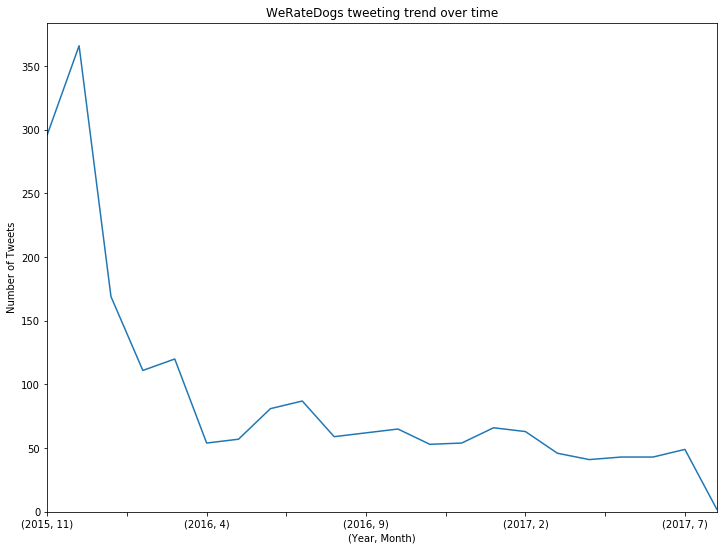

In [76]:
data = df.tweet_id.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).count()
ax = data.plot('line', title='WeRateDogs tweeting trend over time')
ax.set_xlabel("(Year, Month)")
ax.set_ylabel("Number of Tweets")
ax.set_ylim(0, )
plt.savefig('tweet_trend')

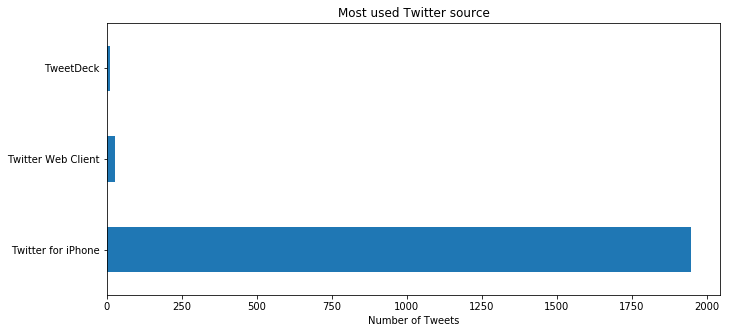

In [77]:
df['source'].value_counts().plot('barh', figsize=(11,5), title='Most used Twitter source').set_xlabel("Number of Tweets")
plt.savefig('twitter_source')

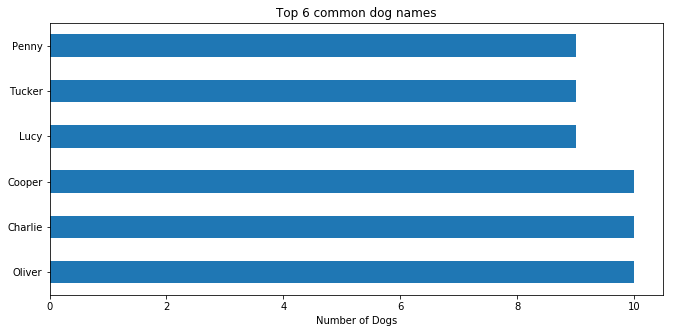

In [78]:
df.name.value_counts()[1:7].plot('barh', figsize=(11,5), title='Top 6 common dog names').set_xlabel("Number of Dogs")
plt.savefig('dog_names')

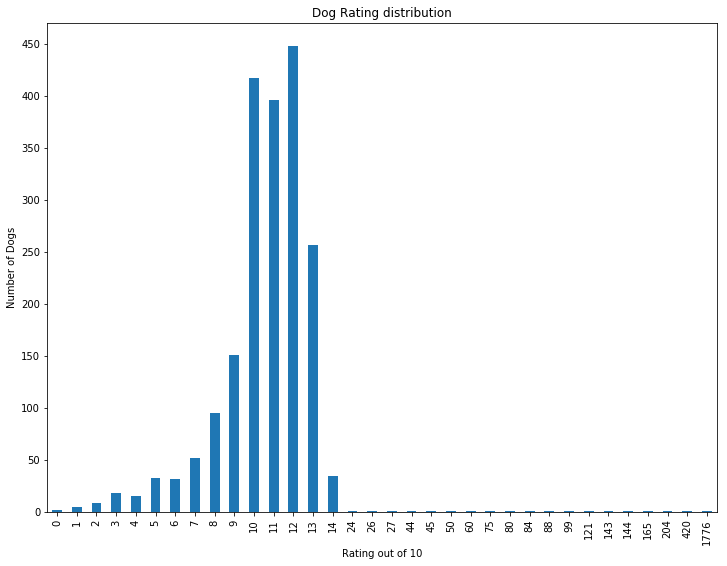

In [79]:
ax = df.rating_numerator.value_counts().sort_index().plot('bar', title = 'Dog Rating distribution')
ax.set_xlabel("Rating out of 10")
ax.set_ylabel("Number of Dogs")
ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450])
plt.savefig('rating_dist')

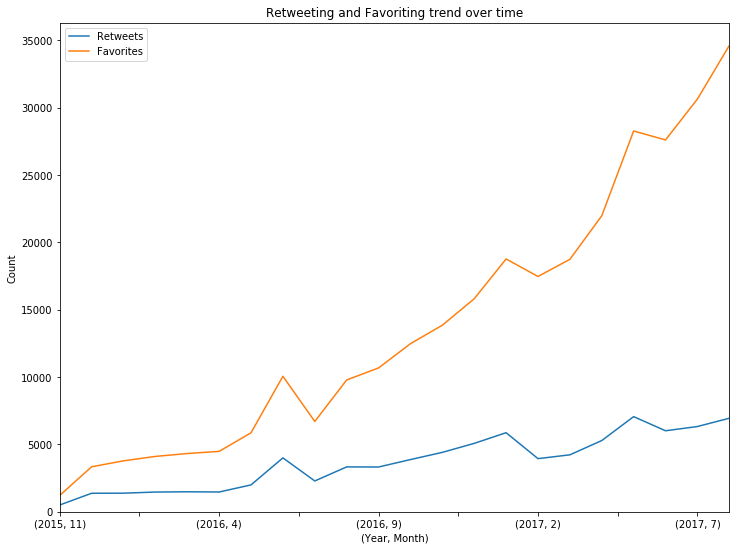

In [80]:
plt.subplots(1, sharex=True)
df.retweet_count.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('line')
df.favorite_count.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('line').set_ylim(0, )
plt.title('Retweeting and Favoriting trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'))
plt.savefig('ret_fav')